<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

#### 2. Connect to the Database


**Install the needed libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [ ]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


#### Demo 2: List All Tables


In [ ]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


#### Demo 3: Group Data by Age


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [2]:
df=pd.read_csv(r'D:\My folder\ostad\coursera\Ibm-data-analyst-capstone-project\cleaned_survey_data_v2.csv')

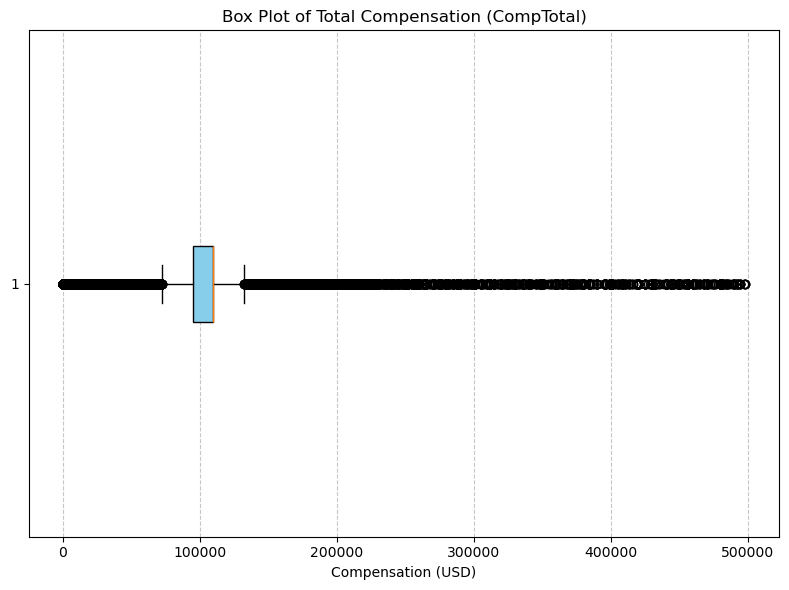

In [5]:
# your code goes here
df = df[df['CompTotal'] < 500000]
plt.figure(figsize=(8, 6))
plt.boxplot(df['CompTotal'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.xlabel('Compensation (USD)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


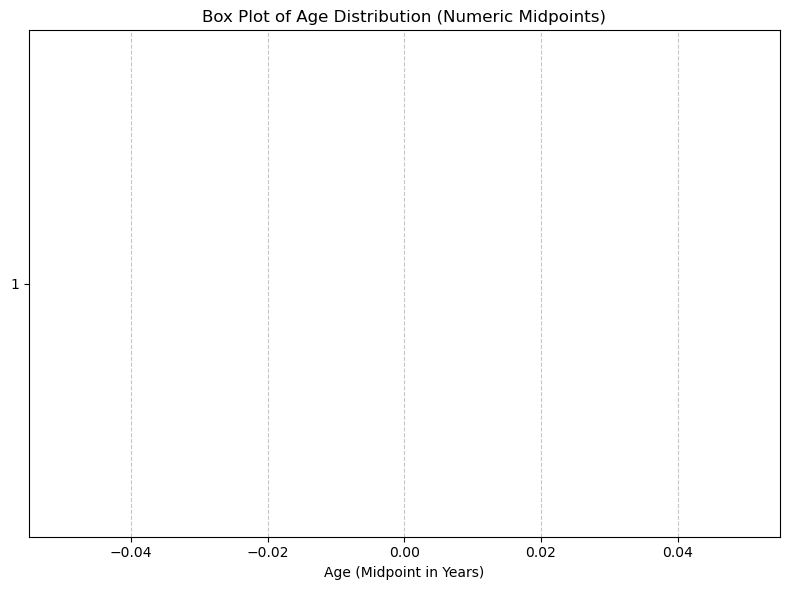

In [13]:
# your code goes here

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric']=df['Age'].map(age_map)
# Create box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['AgeNumeric'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Age Distribution (Numeric Midpoints)')
plt.xlabel('Age (Midpoint in Years)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

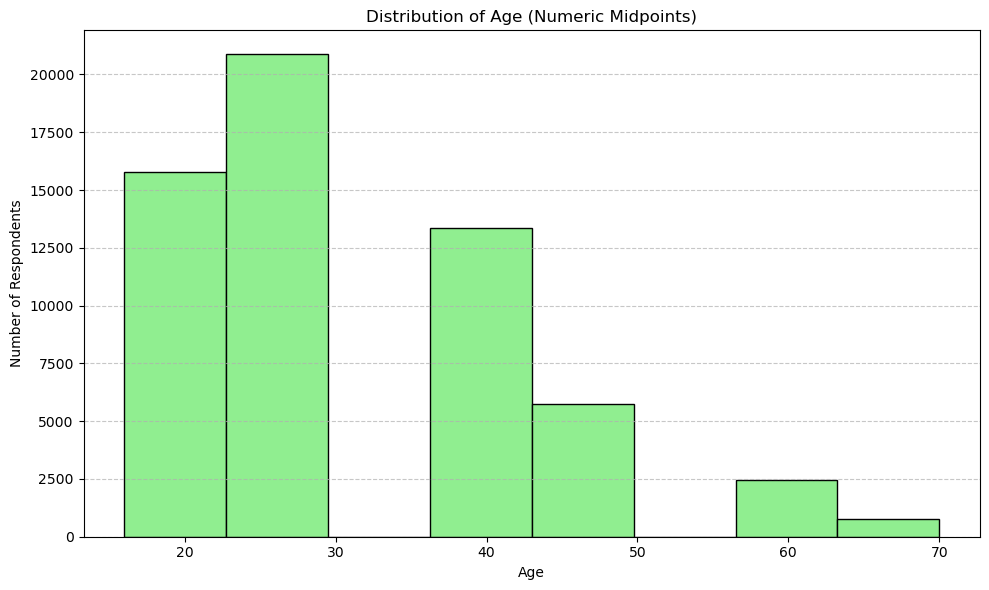

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['AgeNumeric'], bins=8, color='lightgreen', edgecolor='black')
plt.title('Distribution of Age (Numeric Midpoints)')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1200x600 with 0 Axes>

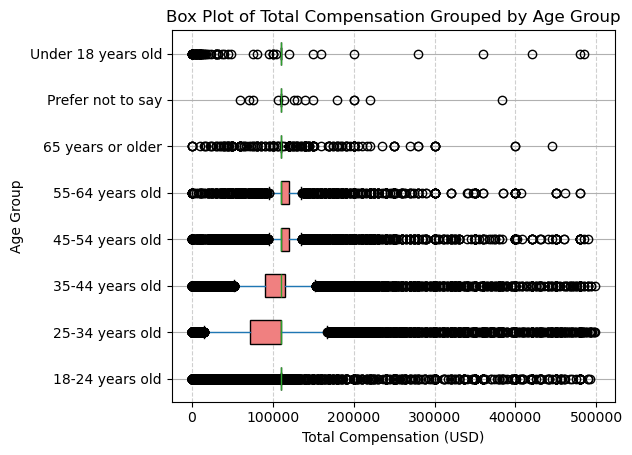

In [14]:
# your code goes here
df = df[df['CompTotal'] < 500000]  # Adjust if necessary

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplot
df.boxplot(column='CompTotal', by='Age', vert=False, patch_artist=True,
           boxprops=dict(facecolor='lightcoral'))

# Plot titles and labels
plt.title('Box Plot of Total Compensation Grouped by Age Group')
plt.suptitle('')  # Removes default 'CompTotal by Age' title
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Age Group')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1200x600 with 0 Axes>

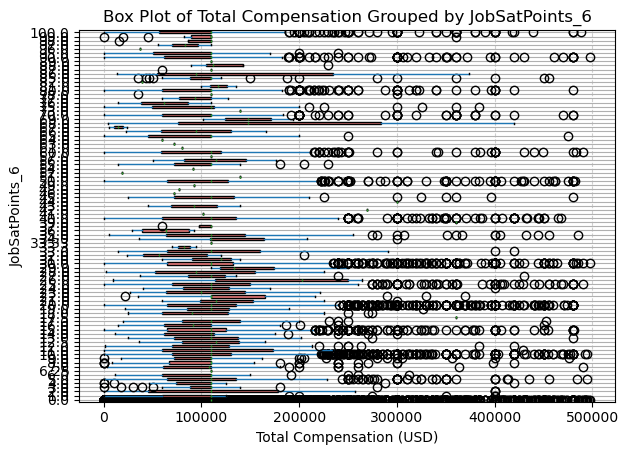

In [15]:
# your code goes here
# your code goes here
df = df[df['CompTotal'] < 500000]  # Adjust if necessary

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplot
df.boxplot(column='CompTotal', by='JobSatPoints_6', vert=False, patch_artist=True,
           boxprops=dict(facecolor='lightcoral'))

# Plot titles and labels
plt.title('Box Plot of Total Compensation Grouped by JobSatPoints_6')
plt.suptitle('')  # Removes default 'CompTotal by Age' title
plt.xlabel('Total Compensation (USD)')
plt.ylabel('JobSatPoints_6')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1200x600 with 0 Axes>

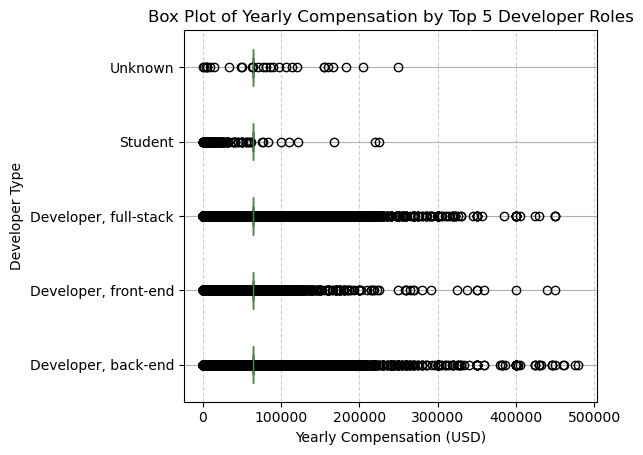

In [16]:
# Handle multiple roles per respondent
dev_roles = df['DevType'].str.split(';').explode().str.strip()

# Count top 5 developer types
top_5_roles = dev_roles.value_counts().head(5).index.tolist()

# Filter dataset to only include top 5 roles
df['PrimaryRole'] = df['DevType'].apply(lambda x: next((role for role in top_5_roles if role in x), None))
df = df[df['PrimaryRole'].notnull()]

# Optional: Filter extreme compensation outliers
df = df[df['ConvertedCompYearly'] < 500000]

# Plot box plot
plt.figure(figsize=(12, 6))
df.boxplot(column='ConvertedCompYearly', by='PrimaryRole', vert=False, patch_artist=True,
           boxprops=dict(facecolor='lightgreen'))

plt.title('Box Plot of Yearly Compensation by Top 5 Developer Roles')
plt.suptitle('')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Developer Type')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1200x600 with 0 Axes>

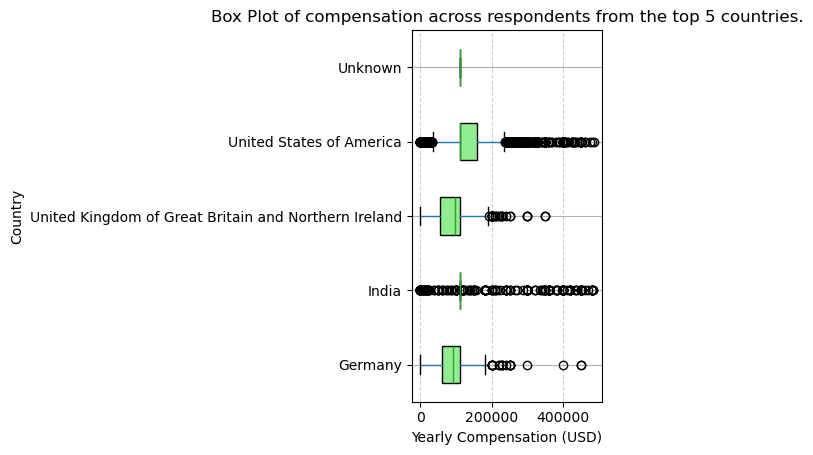

In [18]:
# your code goes here
# Handle multiple roles per respondent
country = df['Country'].str.split(';').explode().str.strip()

# Count top 5 developer types
top_5_country = country.value_counts().head(5).index.tolist()

# Filter dataset to only include top 5 roles
df['top_country'] = df['Country'].apply(lambda x: next((country for country in top_5_country if country in x), None))
df = df[df['top_country'].notnull()]

# Optional: Filter extreme compensation outliers
df = df[df['CompTotal'] < 1000000]

# Plot box plot
plt.figure(figsize=(12, 6))
df.boxplot(column='CompTotal', by='top_country', vert=False, patch_artist=True,
           boxprops=dict(facecolor='lightgreen'))

plt.title('Box Plot of compensation across respondents from the top 5 countries.')
plt.suptitle('')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


C:\Users\43667\AppData\Local\Temp\ipykernel_12836\3114925067.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

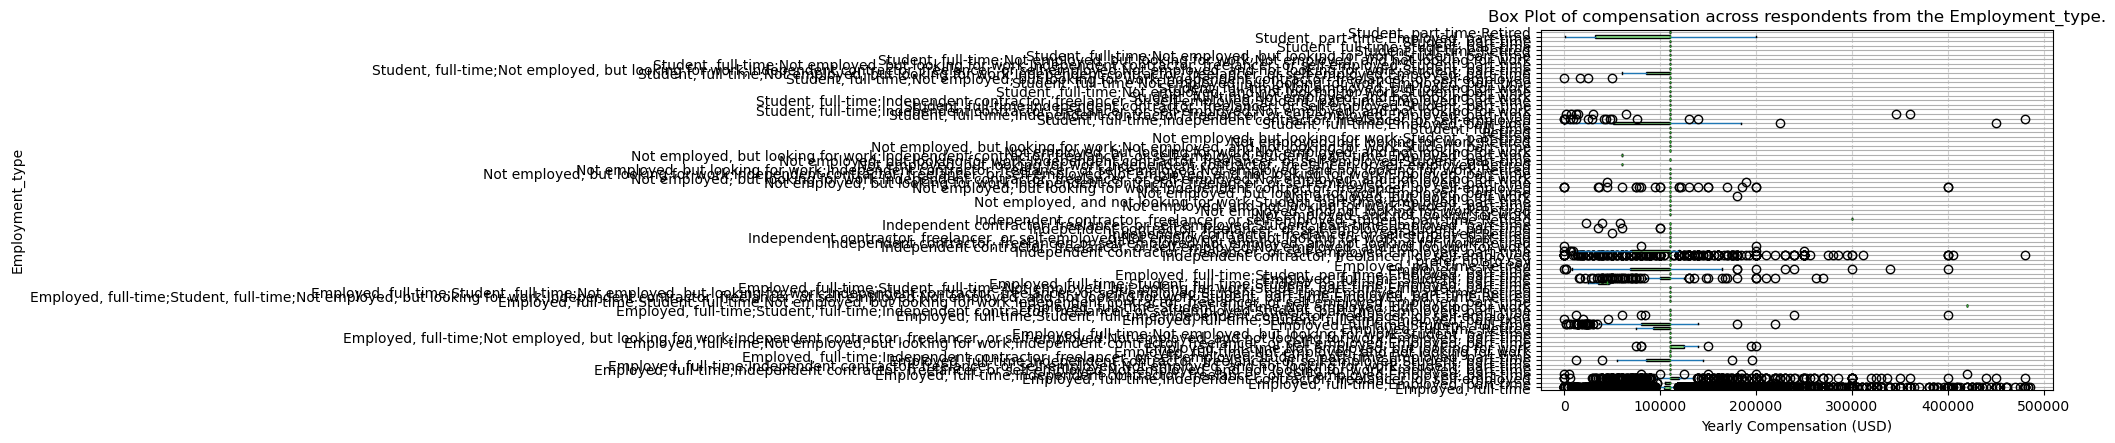

In [20]:
# your code goes here
# Plot box plot

plt.figure(figsize=(12, 6))
df.boxplot(column='CompTotal', by='Employment', vert=False, patch_artist=True,
           boxprops=dict(facecolor='lightgreen'))

plt.title('Box Plot of compensation across respondents from the Employment_type.')
plt.suptitle('')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Employment_type')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

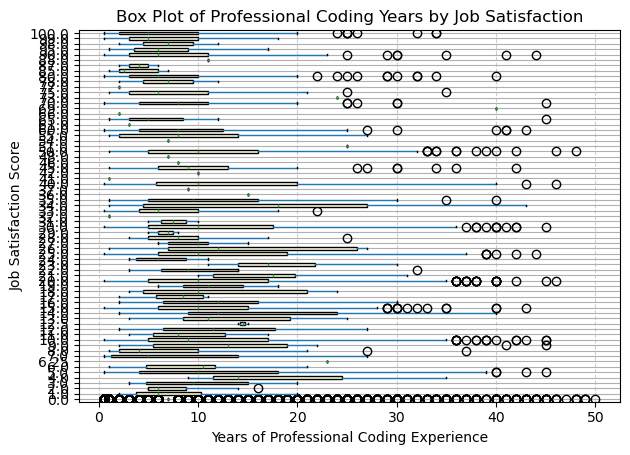

In [21]:
# your code goes here
df = df[df['YearsCodePro'] <= 50]

# Create box plot
plt.figure(figsize=(10, 6))
df.boxplot(column='YearsCodePro', by='JobSatPoints_6', vert=False, patch_artist=True,
           boxprops=dict(facecolor='lightyellow'))

plt.title('Box Plot of Professional Coding Years by Job Satisfaction')
plt.suptitle('')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
